In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Preprocesamiento y entrenamiento Tamaño de imágenes

path = "C:\\Users\\aarte\\OneDrive\\Desktop\\ExamenTratamientoDatos\\dataset"
Dataset_train = os.path.join(path, 'train')
Dataset_test = os.path.join(path, 'test')
total_train = sum([len(files) for _, _, files in os.walk(Dataset_train)])
total_test = sum([len(files) for _, _, files in os.walk(Dataset_test)])
print("{} imágenes de training.".format(total_train))
print("{} imágenes de testing.".format(total_test))
Clasificar = sorted([dI for dI in os.listdir(Dataset_train) if os.path.isdir(os.path.join(Dataset_train, dI))])
print("Nombres Clase:", Clasificar)

batch = 32
height = 150
widh = 150

image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = image_generator.flow_from_directory(
    Dataset_train,
    batch_size=batch,
    target_size=(height, widh),
    class_mode='binary',
    subset='training'
)
validation_data_gen = image_generator.flow_from_directory(
    Dataset_train,
    batch_size=batch,
    target_size=(height, widh),
    class_mode='binary',
    subset='validation'
)
test_data_gen = test_image_generator.flow_from_directory(
    Dataset_test,
    batch_size=batch,
    target_size=(height, widh),
    class_mode='binary',
    shuffle=False
)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(height, widh, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()
epochs = 10
history = model.fit(train_data_gen,epochs=epochs,validation_data=validation_data_gen)
model.save("C:\\Users\\aarte\\OneDrive\\Desktop\\ExamenTratamientoDatos\\modelo_CNN.h5")

1635 imágenes de training.
812 imágenes de testing.
Nombres Clase: ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
Found 1310 images belonging to 8 classes.
Found 323 images belonging to 8 classes.
Found 810 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                

C:\Users\aarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


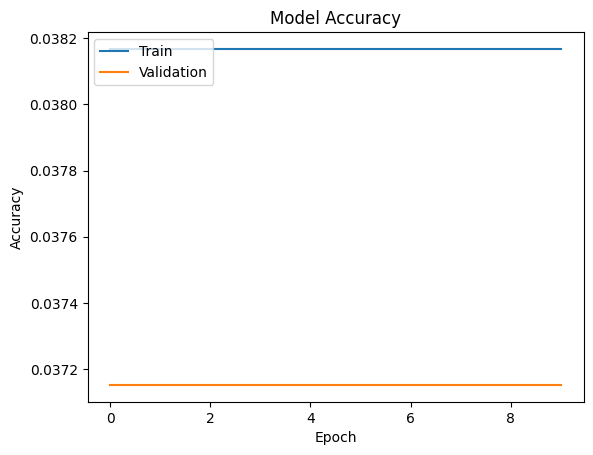

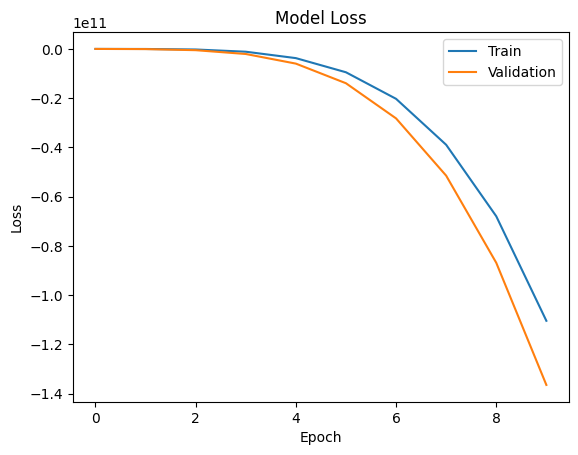

In [2]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
sorted_class_names = sorted([class_dir for class_dir in os.listdir(Dataset_test) if os.path.isdir(os.path.join(Dataset_test, class_dir))])

# Clasify test images
for class_name in sorted_class_names:
    folder_path = os.path.join(Dataset_test, class_name)
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".png"):
                # Get file path
                file_path = os.path.join(folder_path, file_name)
                
                # Load and resize the image
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(height, widh))
                
                # Convert image to array
                input_arr = tf.keras.preprocessing.image.img_to_array(image)
                input_arr = np.array([input_arr])
                
                # Predict using the model
                predictions = model.predict(input_arr)
                score = predictions[0][0]

                print("Image {} is predicted as {} with {:.2f}% accuracy."
                      .format(file_path, class_name, 100 * score))

1/1 [==============================] - 0s 117ms/step
Image C:\Users\aarte\OneDrive\Desktop\ExamenTratamientoDatos\dataset\test\CLASS_01\14-CAPTURE_20220523_141530_080.png is predicted as CLASS_01 with 100.00% accuracy.
1/1 [==============================] - 0s 39ms/step
Image C:\Users\aarte\OneDrive\Desktop\ExamenTratamientoDatos\dataset\test\CLASS_02\05-CAPTURE_20220421_053715_321.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 39ms/step
Image C:\Users\aarte\OneDrive\Desktop\ExamenTratamientoDatos\dataset\test\CLASS_02\10-CAPTURE_20220531_103015_235.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 47ms/step
Image C:\Users\aarte\OneDrive\Desktop\ExamenTratamientoDatos\dataset\test\CLASS_02\10-CAPTURE_20220531_103237_465.png is predicted as CLASS_02 with 100.00% accuracy.
1/1 [==============================] - 0s 42ms/step
Image C:\Users\aarte\OneDrive\Desktop\ExamenTratamientoDatos\dataset\test\C